In [1]:
#1. Завантажити набір даних. 
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

dt = load_breast_cancer()
print(dt.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [2]:
#2. Розділити дані на тренувальний та тестовий набори. 
X = dt.data
y = dt.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
#3. Застосувати SVM і Random Forest для визначення важливих ознак. 
svm_cl = SVC(kernel='linear')
svm_cl.fit(X_train, y_train)
svm_pred = svm_cl.predict(X_test)

rf_cl = RandomForestClassifier(random_state=42)
rf_cl.fit(X_train, y_train)
rf_pred = rf_cl.predict(X_test)

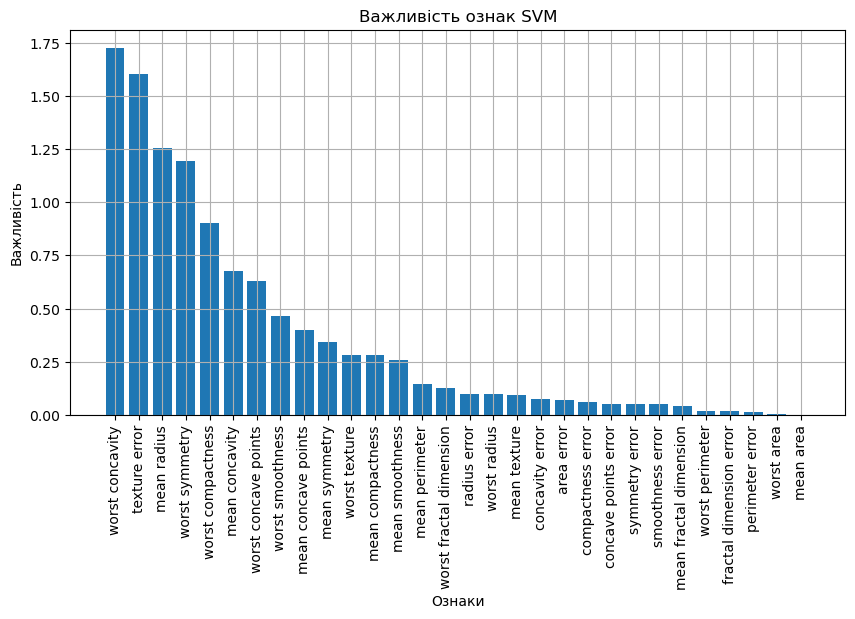

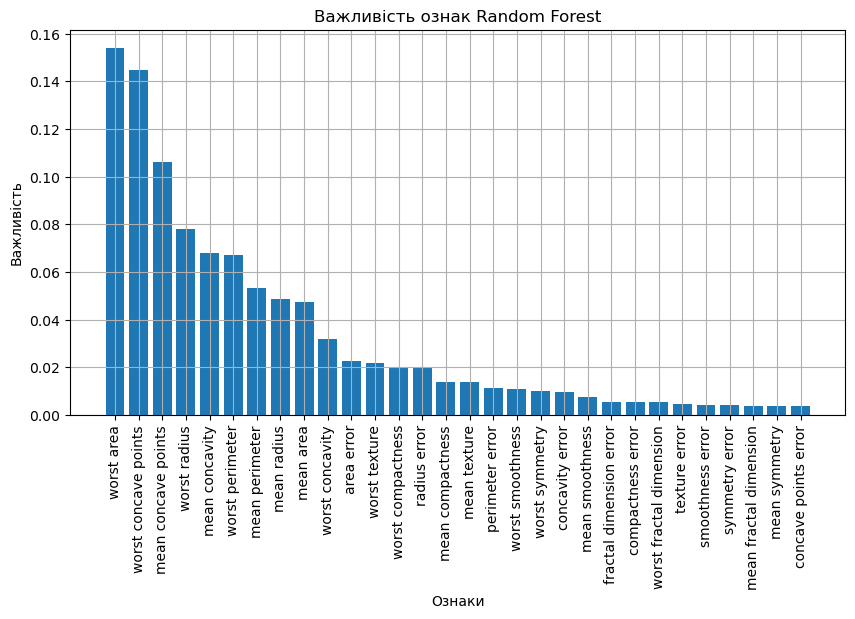

In [4]:
#4. Побудувати графік або таблицю, щоб показати важливість кожної ознаки в аналізі. 
importance_rf = rf_cl.feature_importances_
sort_rf = np.argsort(importance_rf)[::-1]

importance_svm = np.abs(svm_cl.coef_[0])
sort_svm = np.argsort(importance_svm)[::-1]

plt.figure(figsize=(10, 5))
plt.bar(range(X_train.shape[1]), importance_svm[sort_svm], align="center")
plt.xticks(range(X_train.shape[1]), dt.feature_names[sort_svm], rotation=90)
plt.title("Важливість ознак SVM")
plt.xlabel("Ознаки")
plt.ylabel("Важливість")
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(range(X_train.shape[1]), importance_rf[sort_rf], align="center")
plt.xticks(range(X_train.shape[1]), dt.feature_names[sort_rf], rotation=90)
plt.title("Важливість ознак Random Forest")
plt.xlabel("Ознаки")
plt.ylabel("Важливість")
plt.grid()
plt.show()

In [5]:
#5. Обговорити результати та визначити, які ознаки найбільше впливають на вихідні дані. 
influential_rf = dt.feature_names[sort_rf][:5]
print("Перших 5 ознак з використанням алгоритму SVM, які найбільше впливають на вихідні дані:\n", influential_rf)

influential_svm = dt.feature_names[sort_svm][:5]
print("\nПерших 5 ознак з використанням алгоритму Random Forest, які найбільше впливають на вихідні дані:\n", influential_svm)

Перших 5 ознак з використанням алгоритму SVM, які найбільше впливають на вихідні дані:
 ['worst area' 'worst concave points' 'mean concave points' 'worst radius'
 'mean concavity']

Перших 5 ознак з використанням алгоритму Random Forest, які найбільше впливають на вихідні дані:
 ['worst concavity' 'texture error' 'mean radius' 'worst symmetry'
 'worst compactness']


In [6]:
#6. Обчислити точність для двох алгоритмів і порівняти результати  
svm_accuracy = accuracy_score(y_test, svm_pred)
print("Точність алгоритму SVM: ", svm_accuracy)

rf_accuracy = accuracy_score(y_test, rf_pred)
print("Точність алгоритму Random Forest: ", svm_accuracy)

if svm_accuracy < rf_accuracy:
    print("Random Forest є більш ефективним.")
elif svm_accuracy > rf_accuracy:
    print("Алгоритм SVM є більш ефективним.")
else:
    print("Алгоритми мають однакому точність при використанні.")

Точність алгоритму SVM:  0.956140350877193
Точність алгоритму Random Forest:  0.956140350877193
Random Forest є більш ефективним.


Висновок: на практичній роботі я навчився застосувати SVM і Random Forest для визначення важливих ознак, будувати графіки, щоб показати важливість кожної ознаки в аналізі та визначати, які ознаки найбільше впилвають на вихідні дані. 